# Reconocimiento de Ataques Epilépticos

## Introducción

El electroecenfalograma (EEG) es un análisis que se utiliza para detectar aomalías relacionadas con la actividad eléctrica del cerebro. Este procedimiento realiza un seguimiento de las ondas cerebrales y las registra, mediante la colocación de discos metálicos con cables delgados (electrodos) sobre el cuero cabelludo y se envían señales a una computadora para registrar los resultados. La actividad eléctrica normal del cerebro forma un patrón reconocible. Por medio de un EEG es posible buscar patrones anormales que indiquen convulsiones u otros problemas, permitiendo así el diagnóstico y el control de los trastornos convulsivos.

En la actualidad, un neurólogo es el encargado de leer e interpretar los resultados obtenidos por el electroecenfalograma, los cuales varían en complejidad y duración; ya que puede verse alterado por el comportamiento que tenga el paciente durante el examen. Debido a esto, no cabe duda que el diagnóstico esté altamente ligado al criterio profesional del médico. Con el fin de reducir el error o la influencia de la interpretación humana en el diagnóstico del paciente, se propone realizar un modelo de clasificación que permita determinar si el paciente presenta durante la realización del examen, algún indicio de ataque convulsivo. De este modo, es posible desarrollar un "estándar", con una alta confiabilidad (superior al 85%), en el diagnóstico del paciente.

Este proyecto parte de la hipótesis de que es posible, mediante un modelo de clasificación, determinar si el sujeto se encuentra bajo una actividad convulsiva, esto basado en las lecturas registradas por el EEG; por lo que se tiene como objetivo el desarrollo de un modelo de clasificación que permita obtener un diagnóstico, superior al 85% en confiabilidad, para el paciente, partiendo de los resultados obtenidos en el EEG realizado.

El conjunto de datos con el que se desarrolla el proyecto es una serie temporal que muestrea en 4097 puntos de datos un conjunto de referencia que consta de 5 carpetas diferentes, cada una con 100 archivos, donde cada archivo representa un solo sujeto o paciente. Cada uno de estos archivos del conjunto de datos de referencia es una grabación cerebral durante 23.6 segundos. Cada punto de datos es el valor de la grabación del electroecenfalograma (EEG) en un punto diferente en el tiempo; por lo que el conjunto de datos con el que se trabaja corresponde a 4097 puntos de datos durante 23.5 segundos para cada uno de los 500 individuos en análisis.

Estos 4097 puntos de datos se dividen en 23 fragmentos que contienen 178 puntos de datos durante 1 segundo, donde cada uno estos puntos de datos es el valor de la grabación del EEG en un momento diferente. Con esto, finalmente se tiene un conjunto de datos conformado por 11500 piezas de información (filas) y, cada una de estas contiene un total de 178 puntos de datos por 1 segundo conformando las columnas. Además, se cuenta con una columna adicional representada con la etiqueta "y" correspondiente a la variable de respuesta, conformada por valores numéricos enteros que indican lo siguiente:

- 5: indica que el paciente tenía los ojos abiertos en el momento en que se graba la señal de EEG.
- 4: indica que el paciente tenía los ojos cerrados en el momento en que se graba la señal de EEG.
- 3: si se identifica dónde estaba la región del tumor en el cerebro y registran la actividad EEG del área cerebral sana.
- 2: registran el EEG del área donde se localizó el tumor.
- 1: registro de la actividad convulsiva.

Para el caso en el que los pacientes se ubiquen en las clases 2, 3, 4 y 5; indica que son sujetos que no tuvieron crosos epilépticas. Úncamente los sujetos que se ubican en la categoría 1 tuvieron crisis epilépticas.

A pesar de que se cuentan con 5 clases distintas en la variable de respuesta, se va a realizar el análisis con una clasificación binaria que determine si el sujeto registró o no alguna actividad epiléptica.

## Importando las librerías y los módulos

Inicialmente, se procede a llamar todos los módulos que se necesitan para la realización de la tarea:

In [1]:
# imports
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# model metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.model_selection import cross_val_score

# cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# PCA
from sklearn.decomposition import PCA

## Preprocesamiento del conjunto de datos

Se importa el conjuto de datos con el que se lleva a cabo el análisis:

In [2]:
# data
EEG_DF = pd.read_csv('Reconocimiento_de_Ataques_Epilepticos.csv')
EEG_DF.head()

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

Se verifica si existe algún valor faltante dentro del conjunto de datos:

In [3]:
EEG_DF.isnull().sum().sort_values()

Unnamed: 0    0
X115          0
X116          0
X117          0
X118          0
             ..
X62           0
X63           0
X64           0
X66           0
y             0
Length: 180, dtype: int64

De lo anterior, se puede observar que no existen valores "nulos" dentro del conjunto de datos, por lo que se puede seguir con el análisis del mismo.

La primer columna no aporta ningún tipo de información, por lo que se procede a la eliminación de esta:

In [4]:
EEG_DF = EEG_DF.drop(columns=['Unnamed: 0'])
EEG_DF.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

Se examina la estructura de los datos y el tipo de variables de los mismos:

In [5]:
EEG_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


De lo anterior, se observa que todas las variables corresponden a datos de tipo numérico. Sin embargo, hay que tener en cuenta que a pesar de que la variable de respuesta 'y' está representada por valores numéricos, estos representan categorías. Como se menciona anteriormente, el enfoque de este análisis es únicamente determinar si el sujeto registró o no alguna actividad epiléptica, por lo que, además de cambiar la variable 'y' como categórica, se sustituyen los valores 2, 3, 4 y 5, como categoría 0, la cual estaría indicando que el paciente no registró actividad convulsiva.

In [6]:
EEG_DF['y'] = EEG_DF.loc[:, 'y'].replace([2, 3, 4, 5], 0)
EEG_DF.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  0  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  0  
3   -77   -85   -77   -72   -69   -65  0  
4   -32   -41   -65   -83   -89   -73  0  

[5 rows x 179 columns]

Se convierte la variable de respuesta 'y' a variable de tipo nominal o categórica:

In [7]:
EEG_DF = EEG_DF.astype({'y': 'category'})

In [8]:
EEG_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: category(1), int64(178)
memory usage: 15.6 MB


Definidas las categorías de la variable de respuesta, se analiza estadísticamente, mediante la función describe(), el conjunto de datos separando los casos en los que se registran estados epilépticos y los que no.

In [9]:
# Description of Non Epileptic Registers
EEG_DF[EEG_DF['y'] == 0].describe()

X1           X2           X3           X4           X5  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000   
mean     -8.992609    -8.877174    -8.910435    -8.969783    -9.085326   
std      70.455286    70.560110    70.372582    70.030409    69.377958   
min    -566.000000  -609.000000  -594.000000  -549.000000  -603.000000   
25%     -44.000000   -44.000000   -45.000000   -45.000000   -45.000000   
50%      -7.000000    -7.000000    -7.000000    -8.000000    -8.000000   
75%      26.000000    27.000000    28.000000    27.000000    27.000000   
max    1726.000000  1713.000000  1697.000000  1612.000000  1437.000000   

                X6           X7           X8           X9          X10  ...  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000  ...   
mean     -9.436848    -9.852500   -10.215326   -10.292717   -10.404022  ...   
std      69.291403    69.555105    69.635977    69.139111    68.502271  ...   
min    -801.000000  -956.000000 -1092.000000  -784.000000  -769.000000  ...   
25%     -45.000000   -45.000000   -47.000000   -47.000000   -47.000000  ...   
50%      -9.000000    -9.000000    -9.000000    -8.000000    -8.000000  ...   
75%      28.000000    27.000000    27.000000    27.000000    26.000000  ...   
max    1242.000000  1044.000000   868.000000   869.000000  1077.000000  ...   

              X169         X170         X171         X172         X173  \
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000   
mean    -10.056957   -10.253478   -10.560543   -10.583587   -10.479891   
std      69.856421    68.825267    68.028089    67.878426    68.128134   
min    -646.000000  -609.000000  -590.000000  -597.000000  -584.000000   
25%     -46.000000   -46.000000   -46.000000   -47.000000   -47.000000   
50%      -8.000000    -9.000000    -9.500000   -10.000000   -10.000000   
75%      27.000000    26.000000    25.000000    25.000000    26.000000   
max    2047.000000  1777.000000  1472.000000  1280.000000  1436.000000   

              X174         X175         X176         X177         X178  
count  9200.000000  9200.000000  9200.000000  9200.000000  9200.000000  
mean    -10.148696    -9.848587    -9.620435    -9.395435    -9.240435  
std      68.868079    69.550894    70.353607    70.934300    71.185850  
min    -571.000000  -570.000000  -594.000000  -563.000000  -559.000000  
25%     -46.000000   -45.000000   -46.000000   -45.000000   -45.000000  
50%      -9.000000    -9.000000    -8.000000    -9.000000    -8.000000  
75%      26.000000    27.000000    27.000000    27.000000    27.000000  
max    1733.000000  1958.000000  2047.000000  2047.000000  1915.000000  

[8 rows x 178 columns]

In [10]:
# Description of Epileptic Registers
EEG_DF[EEG_DF['y'] == 1].describe()

X1           X2           X3           X4           X5  \
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000   
mean    -21.936522   -19.049130   -15.293913    -9.836087    -3.707391   
std     342.361939   343.398782   337.489643   332.354833   332.211163   
min   -1839.000000 -1838.000000 -1835.000000 -1845.000000 -1791.000000   
25%    -193.250000  -191.250000  -187.000000  -184.000000  -174.250000   
50%     -16.000000   -18.000000   -12.500000    -6.000000   -12.000000   
75%     159.000000   168.250000   169.250000   166.250000   170.000000   
max    1314.000000  1356.000000  1274.000000  1226.000000  1518.000000   

                X6           X7           X8           X9          X10  ...  \
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000  ...   
mean      2.730000     6.899565     7.425652     8.380870    10.773913  ...   
std     332.941638   332.899545   334.375084   334.534814   331.071853  ...   
min   -1757.000000 -1832.000000 -1778.000000 -1840.000000 -1867.000000  ...   
25%    -169.000000  -162.000000  -156.250000  -157.000000  -154.000000  ...   
50%      -7.000000     0.000000     4.000000     8.500000    12.500000  ...   
75%     175.000000   178.250000   175.000000   174.000000   176.250000  ...   
max    1816.000000  2047.000000  2047.000000  2047.000000  2047.000000  ...   

              X169         X170         X171         X172         X173  \
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000   
mean     -7.266522    -9.714783   -15.909565   -22.383043   -26.424783   
std     342.095308   341.534693   345.740615   351.503084   351.184524   
min   -1860.000000 -1867.000000 -1865.000000 -1642.000000 -1723.000000   
25%    -187.250000  -178.250000  -180.000000  -188.000000  -195.000000   
50%     -11.000000   -11.000000   -12.000000   -16.000000   -16.500000   
75%     178.000000   174.000000   162.250000   159.250000   160.000000   
max    1398.000000  1419.000000  1413.000000  1319.000000  1186.000000   

              X174         X175         X176         X177         X178  
count  2300.000000  2300.000000  2300.000000  2300.000000  2300.000000  
mean    -26.221739   -25.830870   -25.043913   -24.548261   -24.016522  
std     347.475865   339.650467   335.747017   335.244512   339.819309  
min   -1866.000000 -1863.000000 -1781.000000 -1727.000000 -1829.000000  
25%    -203.000000  -195.000000  -192.000000  -190.250000  -189.000000  
50%     -15.000000   -14.500000   -18.000000   -21.500000   -23.000000  
75%     159.250000   153.250000   150.000000   151.250000   157.250000  
max    1129.000000  1205.000000  1371.000000  1445.000000  1380.000000  

[8 rows x 178 columns]

De lo anterior, se pueden observar cambios significativos para los casos en el que se registra epilepsia con respecto a los que no. Esto se analizará a fondo más adelante.

## Análisis de Datos Exploratorios

A continuación, se generan diferentes visualizaciones con el fin de comprender mejor el conjunto de datos.

Inicialmente, se visualiza mediante un gráfico de pie la cantidad de registros que se tienen para casos no epilépticos y epilépticos.

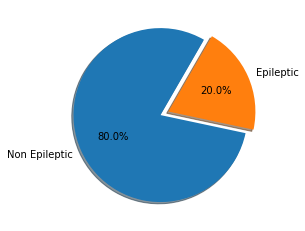

In [11]:
countEpilepticReg = pd.Series(EEG_DF['y'].value_counts(dropna=False))
labels  = "Non Epileptic", "Epileptic"
sizes = [countEpilepticReg.iloc[0], countEpilepticReg.iloc[1]]
explode = (0, 0.1) # only 'explode' the 2nd slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=60)
plt.show()

Se puede observar que únicamente el 20% del conjunto de datos analizado registran casos epilépticos.

Ahora bien, con el fin de comprender mejor estadísticamente el conjunto de datos, se realiza un 'box plot' del promedio de los valores de los registros por el EEG para cada uno de los casos analizados: epilépticos y no epilépticos.

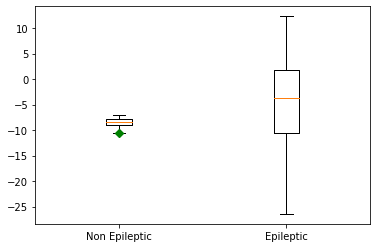

In [12]:
B = [EEG_DF[EEG_DF['y'] == 0].describe().T['mean'], EEG_DF[EEG_DF['y'] == 1].describe().T['mean']]
plt.boxplot(B,0,'gD', labels = labels)
plt.show()

Como se puede observar en el gráfico anterior, el promedio de las mediciones de los casos que no presentan ataques convulsivos se concentran en un rango muy pequeño entre -10 y -5; mientras que para los casos que registran epilepsia, el promedio varia considerablemente, donde la mayor concentración de datos se encuentran entre -12 y 2 aproximadamente, llegando a alcanzar las mediciones inferiores a -25 o superiores a 10 en algunos casos.

Tomando 2 ejemplos de fragmentos de cada uno de los casos en estudio, se procede a graficar un caso en el que el paciente no presente señales de ataque convulsivo contra otro que si con el fin de visualizar las diferencias en ambos casos.

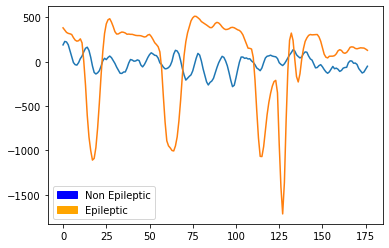

In [13]:
non_epileptic_patch = mpatches.Patch(color='blue', label='Non Epileptic')
epileptic_patch = mpatches.Patch(color='orange', label='Epileptic')

plt.legend(handles=[non_epileptic_patch,epileptic_patch])
[plt.plot(EEG_DF.values[i][1:-1]) for i in range(2)];

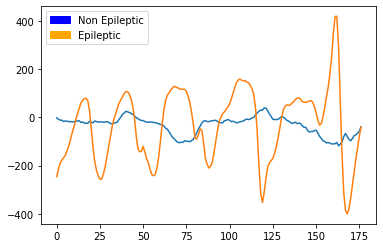

In [14]:
plt.legend(handles=[non_epileptic_patch,epileptic_patch])
[plt.plot(EEG_DF.values[i+7][1:-1]) for i in range(2)];

Ambas visualizaciones confirman lo antes analizado en el 'box plot', en donde se puede observar claramente que para los casos en el que se registra algún ataque convulsivo los niveles de tensión varían entre rangos mucho mayores en comparasión con aquellos que no lo presentan.

Además, se observa una variación aleatoria y más pronunciada de las señales de medición a través del tiempo para los casos en el que se etiqueta como epiléptico. Partiendo de esto, se procede a analizar gráficamente la desviación estándar obtenida para cada uno de los puntos de datos los casos analizados. 

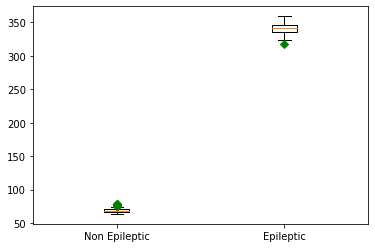

In [15]:
B = [EEG_DF[EEG_DF['y'] == 0].describe().T['std'], EEG_DF[EEG_DF['y'] == 1].describe().T['std']]
plt.boxplot(B,0,'gD', labels = labels)
plt.show()

Se puede observar una clara diferencia entre ambos casos en análisis. Para el caso de en el que el paciente experimenta un ataque convulsivo, la desviación estándar de los datos se ubica en valores cercanos a 340; mientras que para aquellos en el que el paciente no registra el padecimiento, este valor se encuentra alrededor de 70.

Finalmente, se analiza el valor registrado por el EEG para ambas categorías en estudio mediante un gráfico de dispersión, analizando los valores máximos y mínimos alcanzados en cada uno de los fragmentos en los que se divide el conjunto de datos.

Analizando los valores mínimos:

In [16]:
sns.set(style="whitegrid")

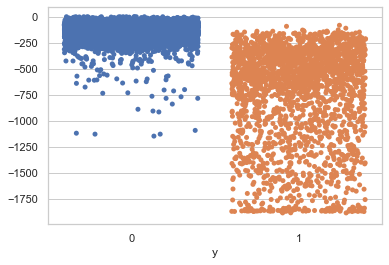

In [17]:
sns.stripplot(x=EEG_DF['y'], y=np.min(EEG_DF, axis=1), jitter=0.4)

Analizando los valores máximos:

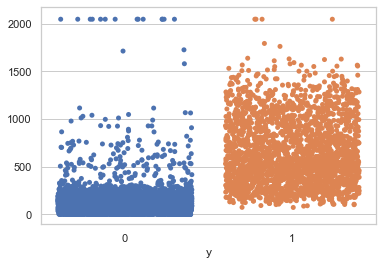

In [18]:
sns.stripplot(x=EEG_DF['y'], y=np.max(EEG_DF, axis=1), jitter=0.4)

Se puede observar una diferencia entre los valores máximos y mínimos alcanzados en las mediciones del EEG para las dos categorías en estudio; siendo la categoría que registra epilepsia aquella que alcanza los valores más altos y  bajos en las mediciones.

Analizando la relación entre los valores máximos y mínimos para cada fragmento de información:

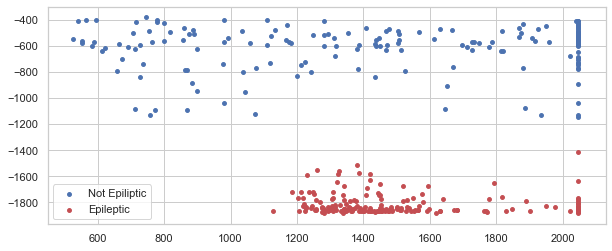

In [19]:
#lists of arrays containing all the EEG measures
not_epileptic = [EEG_DF[EEG_DF['y']==0].iloc[:, range(0, len(EEG_DF.columns)-1)].values]
epileptic = [EEG_DF[EEG_DF['y']==1].iloc[:, range(0, len(EEG_DF.columns)-1)].values]

#defining a function to calculate indicators
def indic(EEG_DF):
    min = np.min(EEG_DF, axis=1)
    max = np.max(EEG_DF, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=15, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=15, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

Se puede observar una clara separación en la relación entre ambas variables, lo cual puede ser de utilidad al momento de entrenar el modelo de clasificación. Debido a esto, se decide crear un nuevo atributo al conjunto de datos denominada 'Delta max-min' la cual corresponde al valor máximo registrado en ese fragmento menos el valor mínimo alcanzado.

In [20]:
max = EEG_DF.max(axis=1)
min = EEG_DF.min(axis=1)
delta = max-min

In [21]:
EEG_DF.insert(178, column='Delta max-min',value=delta)

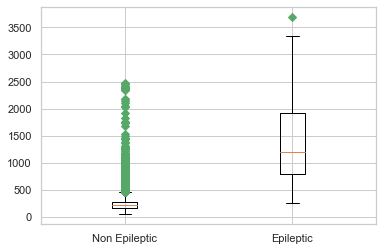

In [22]:
B = [EEG_DF[EEG_DF['y'] == 0]['Delta max-min'], EEG_DF[EEG_DF['y'] == 1]['Delta max-min']]
plt.boxplot(B,0,'gD', labels = labels)
plt.show()

Se procede a analizar la correlación entre los datos, para ello, se cambia temporalmente la variable 'y' como numérico:

In [23]:
EEG_DF = EEG_DF.astype({'y': 'int64'})

In [24]:
corrMat = EEG_DF.corr()
corrMat

X1        X2        X3        X4        X5        X6  \
X1             1.000000  0.947729  0.808192  0.608109  0.393674  0.218226   
X2             0.947729  1.000000  0.944623  0.790403  0.576579  0.369803   
X3             0.808192  0.944623  1.000000  0.939522  0.778648  0.573874   
X4             0.608109  0.790403  0.939522  1.000000  0.938636  0.784954   
X5             0.393674  0.576579  0.778648  0.938636  1.000000  0.941267   
...                 ...       ...       ...       ...       ...       ...   
X176           0.030581  0.023906  0.016982  0.016911  0.018869  0.020977   
X177           0.024562  0.021962  0.017070  0.014671  0.013607  0.017383   
X178           0.020022  0.018059  0.012419  0.006226  0.001298  0.004240   
Delta max-min -0.030410 -0.022989 -0.010613  0.008713  0.029550  0.050143   
y             -0.031262 -0.024503 -0.015615 -0.002149  0.013362  0.030168   

                     X7        X8        X9       X10  ...      X171  \
X1             0.103693  0.044483  0.027923  0.032221  ...  0.045401   
X2             0.211793  0.109478  0.060218  0.043565  ...  0.025937   
X3             0.382493  0.231084  0.133249  0.080003  ...  0.011752   
X4             0.590497  0.399855  0.250052  0.150284  ...  0.000632   
X5             0.792304  0.596424  0.410651  0.265112  ...  0.000918   
...                 ...       ...       ...       ...  ...       ...   
X176           0.017016  0.005851 -0.009052 -0.025522  ...  0.195891   
X177           0.018572  0.012590  0.001943 -0.011809  ...  0.071946   
X178           0.008325  0.008032  0.004823 -0.001332  ...  0.001945   
Delta max-min  0.062784  0.064514  0.069056  0.079348  ... -0.019415   
y              0.041501  0.043528  0.046100  0.052803  ... -0.012878   

                   X172      X173      X174      X175      X176      X177  \
X1             0.051630  0.049604  0.042967  0.036144  0.030581  0.024562   
X2             0.031606  0.030452  0.025975  0.024290  0.023906  0.021962   
X3             0.016424  0.017070  0.014837  0.015536  0.016982  0.017070   
X4             0.006617  0.011882  0.014496  0.016992  0.016911  0.014671   
X5             0.006488  0.013946  0.019146  0.021924  0.018869  0.013607   
...                 ...       ...       ...       ...       ...       ...   
X176           0.359400  0.563321  0.767300  0.933893  1.000000  0.931826   
X177           0.175322  0.337020  0.537493  0.759069  0.931826  1.000000   
X178           0.049854  0.155044  0.315385  0.533265  0.759381  0.934330   
Delta max-min -0.037128 -0.042603 -0.035657 -0.031293 -0.028954 -0.028263   
y             -0.028003 -0.037840 -0.038441 -0.038926 -0.037875 -0.037212   

                   X178  Delta max-min         y  
X1             0.020022      -0.030410 -0.031262  
X2             0.018059      -0.022989 -0.024503  
X3             0.012419      -0.010613 -0.015615  
X4             0.006226       0.008713 -0.002149  
X5             0.001298       0.029550  0.013362  
...                 ...            ...       ...  
X176           0.759381      -0.028954 -0.037875  
X177           0.934330      -0.028263 -0.037212  
X178           1.000000      -0.027973 -0.035855  
Delta max-min -0.027973       1.000000  0.789160  
y             -0.035855       0.789160  1.000000  

[180 rows x 180 columns]

Obteniendo el mapa de calor de la respectiva matríz de correlación:

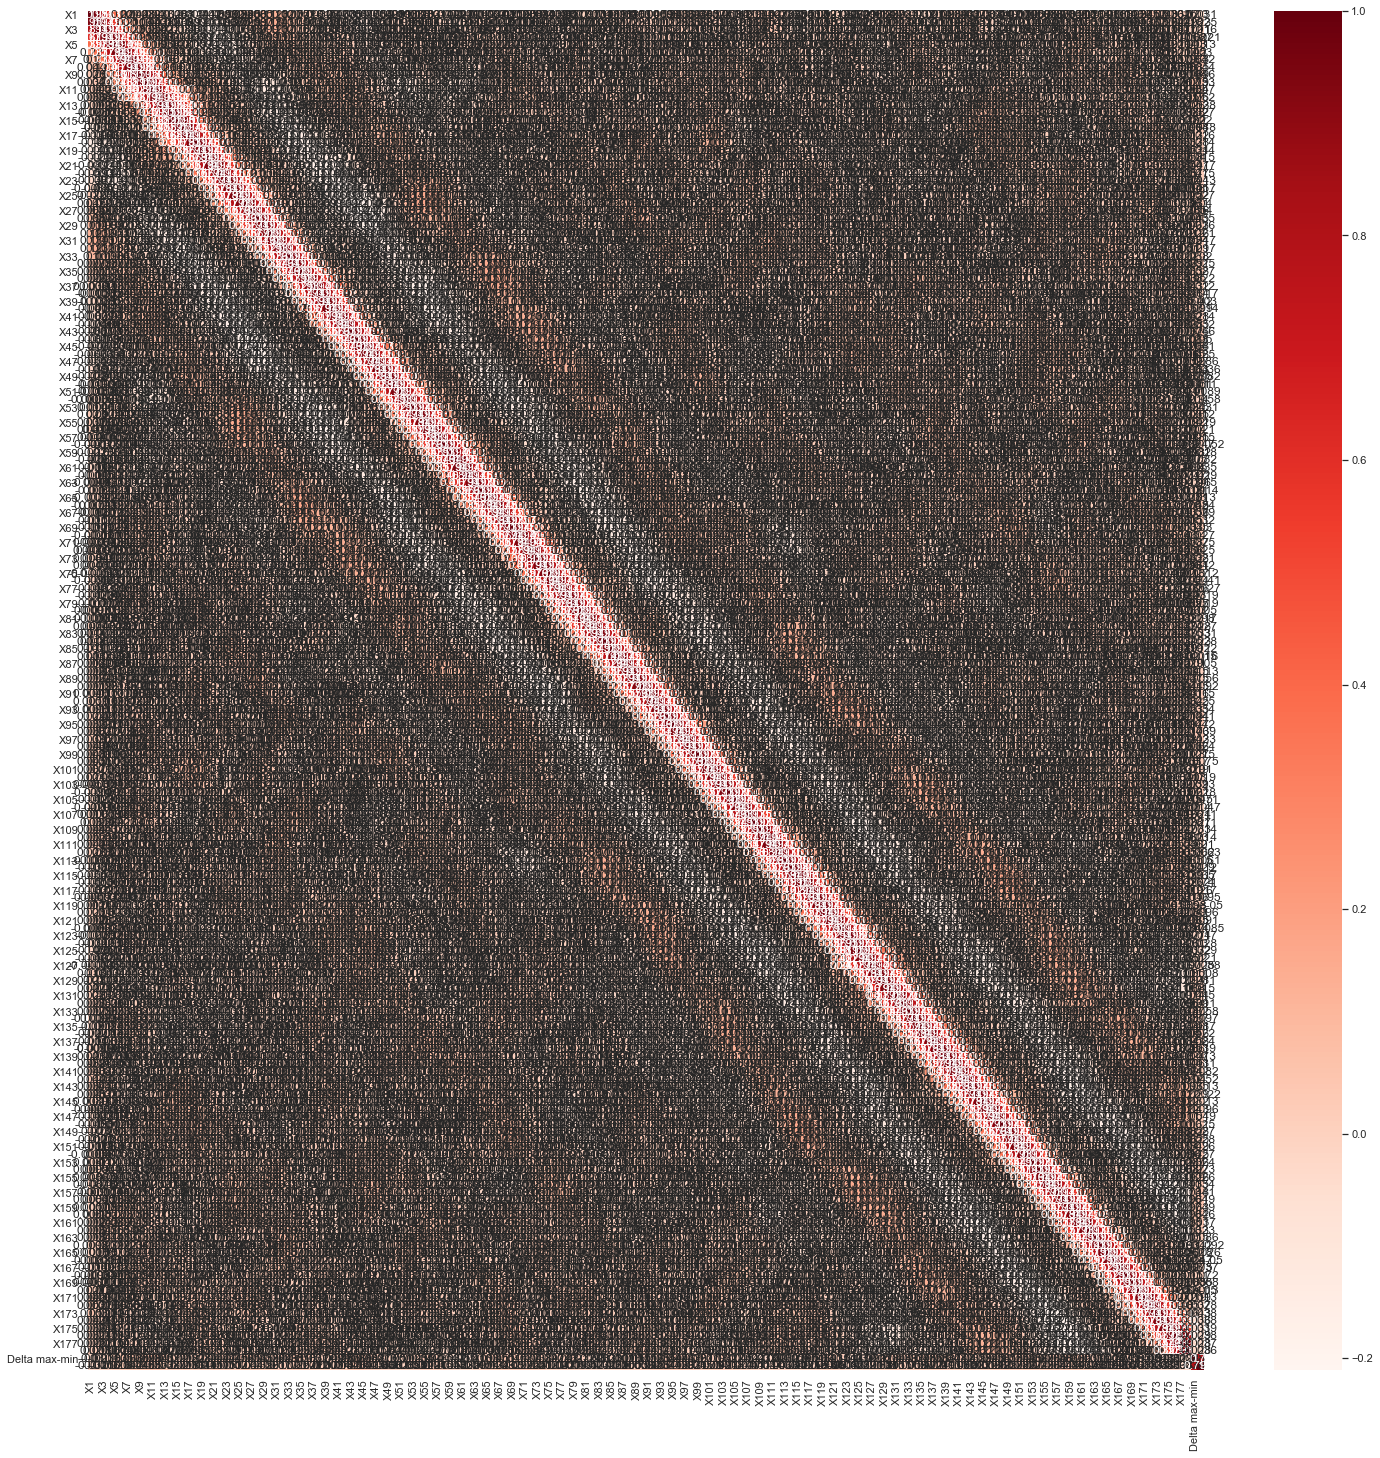

In [25]:
plt.figure(figsize=(25,25))
sns.heatmap(corrMat, annot=True, cmap=plt.cm.Reds)
plt.show()

El resultado del mapa de calor anterior es complejo de leer, por lo que no puede ser relevante en nuestro análisis. Por esto, se procede a resaltar aquellas variables dependientes que tienen una mayor correlación con la variable 'y':

In [26]:
cor_target = abs(corrMat['y'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Delta max-min    0.78916
y                1.00000
Name: y, dtype: float64

Se observa que ninguna de las variables en el conjunto de datos en estudio tienen una alta correlación con la variable dependiente, por lo que se decide no extraer ninguno de los atributos del conjunto de datos. Cabe resaltar que aquella variable que tiene una mayor correlación con la variable 'y' corresponde a la variable creada anteriormente, lo cual puede indicar que su incorporación al conjunto de datos fue conveniente. 

Se devuelve la variable dependiente como categórica para continuar con el análisis:

In [27]:
EEG_DF = EEG_DF.astype({'y': 'category'})

### Seleccionando los Datos y Aplicando PCA

Una vez cargado el conjunto de datos, se procede a seleccionar las características con las que se desarrollará el modelo y la variable dependiente:

In [28]:
#features
features = EEG_DF.iloc[:,0:179]
print('Summary of feature sample')
features.head()

Summary of feature sample


X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  Delta max-min  
0   -77  -103  -127  -116   -83   -51          510.0  
1   152   157   156   154   143   129         2229.0  
2    19   -12   -30   -35   -35   -36          206.0  
3   -77   -85   -77   -72   -69   -65          105.0  
4   -32   -41   -65   -83   -89   -73          181.0  

[5 rows x 179 columns]

In [29]:
#dependent variable
depVar = EEG_DF['y']

Se procede ahora a utilizar PCA con el objetivo de reducir la dimensionalidad del conjunto de datos. Se decide utilizar un mínimo de número de componentes principales que contengan al menos un 95% de la varianza de la siguiente manera:

In [30]:
# Make an instance of the Model
pca = PCA(.95)

#Fit
pca.fit(features)

#Transform
features = pca.transform(features)

In [31]:
features

array([[  23.31253288,  -97.13553886, -182.18419578, ..., -163.90769864,
         -58.83589381,   36.08804818],
       [1803.05656573, -580.59668782, -400.61109426, ...,  454.2336473 ,
         -28.82526465,  133.24295991],
       [-346.22973435,  155.46381633,  -64.39622982, ...,  -84.34639942,
          -4.62260215,  -29.98724191],
       ...,
       [-219.26739227,  -28.60034575,  -25.84251314, ...,  -79.21327448,
         -35.9235635 ,  -59.35703401],
       [-323.80612251,   16.45873885, -196.08916155, ..., -107.77152751,
          10.95039086,  -30.15703726],
       [-214.23462791,   45.0626159 ,   41.90773678, ...,   29.93820806,
         -54.35884925,  -32.96105188]])

In [32]:
features_df = pd.DataFrame(features, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                              'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 
                                              'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 
                                              'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38'])
features_df.head()

PC0         PC1         PC2          PC3          PC4          PC5  \
0    23.312533  -97.135539 -182.184196   115.466833    12.822342   -12.638836   
1  1803.056566 -580.596688 -400.611094  1051.446744  1234.434129  1000.082059   
2  -346.229734  155.463816  -64.396230    98.325469  -102.719701   187.032399   
3  -504.541779   81.737128   22.295852   -85.348865   -16.377864   119.519299   
4  -286.912470    4.600382    6.606235    76.372560   -68.392808    -6.577520   

          PC6         PC7          PC8         PC9  ...        PC29  \
0 -213.085418   94.454845     7.852689  431.794310  ... -108.084949   
1  553.205281  567.066403 -1079.600592  608.378714  ...  403.344859   
2 -157.386608 -177.984790  -244.586394  -77.535168  ...   33.095748   
3 -327.197782 -174.961449  -526.578985  -39.522612  ...  -38.837740   
4  -53.227028  -40.452409   101.854946   -8.244975  ...   45.316380   

          PC30         PC31        PC32        PC33        PC34        PC35  \
0    82.335858  -396.704074  135.780163  -57.899598  -35.058360  -36.569959   
1 -1334.387736 -1218.237545  476.624812 -658.748008 -315.497613  347.597693   
2    -7.472432   -13.167929  175.782758   78.696222   93.850795   71.055368   
3   -56.238021    30.441459   -2.761253   -6.489000   32.885228  -25.456562   
4   -58.539736   -48.387576  -20.550529  -53.308809  -28.360162  -21.825212   

         PC36        PC37        PC38  
0 -163.907699  -58.835894   36.088048  
1  454.233647  -28.825265  133.242960  
2  -84.346399   -4.622602  -29.987242  
3    8.177014   16.830890   34.467851  
4   46.530953 -142.728173  122.460199  

[5 rows x 39 columns]

Como resultado, se reduce el conjunto de datos de 179 atributos a 39, los cuales representan un 95% de la varianza. Con este conjunto de datos se entrena el modelo. El conjunto de datos se divide en dos partes, un conjunto que contiene los diferentes atributos o variables independientes y otro conjunto que contiene la variable dependiente la cual se quiere predecir. Estos a su vez se dividen en conjuntos de entrenamiento (representando el 70% de los datos) y en conjuntos de prueba (los cuales contienen el 30% restante de los datos):

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features_df, depVar, test_size=0.30, random_state=0)

Se verifica la división de los datos que se realizó:

In [34]:
X_train.shape, X_test.shape

((8050, 39), (3450, 39))

## Construyendo los Modelos y Eligiendo el Modelo Correcto

En esta sección se crean los modelos de clasificación para seleccionar el adecuado de acuerdo a las necesidades.

Inicialmente, se establecen variables que se utilizarán para definir cada modelo con algunos parametros definidos:

In [35]:
#Models
modelDTC = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, max_depth=None)
modelKNN = KNeighborsClassifier(n_neighbors=15, weights='uniform')
modelSVC = SVC(kernel='rbf', gamma='scale')
modelRF = RandomForestClassifier(n_jobs= 10, n_estimators=120, criterion='gini', random_state=0)

Se verifica que la columna correcta se esté utilizando como variable dependiente:

In [36]:
#dependent variable
print(depVar)

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: category
Categories (2, int64): [0, 1]


Se utilizan las variables de modelo que se estableció anteriormente y se transfiere los datos de entrenamiento a todos los modelos de la siguiente manera:

In [37]:
#Decision Tree Classifier
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
#Random Forest Classifier
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=10, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
#K-Nearest Neighbors
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [40]:
#Support Vector Classifier
modelSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Seleccionando el Modelo Correcto

En la mayoría de los casos es necesario la construcción de más de un modelo para encontrar el más apropiado para el trabajo. Sci-Kit Learn tiene una función que 'puntuará' la adecuación de cada modelo según el algoritmo utilizado para construirlo; los modelos con los puntajes más altos deben usarse para hacer predicciones. Como primer parámetro de medición del modelo se procede a obtener el valor del 'cross_val_score' de la siguiente manera:

In [41]:
#Decision Tree Classifier model
print(cross_val_score(modelDTC, X_train, y_train))

[0.9515528  0.94720497 0.95093168 0.94347826 0.9484472 ]


In [42]:
#Random Forest model
print(cross_val_score(modelRF, X_train, y_train))

[0.97453416 0.97453416 0.96956522 0.96273292 0.9689441 ]


In [43]:
#K-Nearest Neighbors model
print(cross_val_score(modelKNN, X_train, y_train))

[0.92670807 0.92670807 0.91118012 0.9173913  0.90931677]


In [44]:
#Support Vector Classifier model
print(cross_val_score(modelSVC, X_train, y_train))

[0.97701863 0.97267081 0.96770186 0.96459627 0.96397516]


A continuación, se procede a puntuar cada uno de los modelos creados:

In [45]:
#Decision Tree Classifier Model Scoring
modelDTC.score(X_train,y_train)

1.0

In [46]:
#Random Forest Model Scoring
modelRF.score(X_train,y_train)

1.0

In [47]:
#K-Nearest Neighbors Model Scoring
modelKNN.score(X_train,y_train)

0.9264596273291925

In [48]:
#Support Vector Classifier Model Scoring 
modelSVC.score(X_train,y_train)

0.9838509316770186

Se puede observar que para los modelos de 'Decision Tree Classifier' y 'Random Forest' se tiene una puntuación de 1; lo cual podría estar indicando que este modelo esté inclinando las predicciones a una de las categorías, la cual probablemente corresponda a la categoría de casos en el que no se presenta una actividad convulsiva en el EEG, esto dado a que corresponde al 80% de los casos presentes en el conjunto de datos analizados. Por ello, se debe de prestar atención a estos modelos al momento de hacer las predicciones.

## Haciendo las Predicciones y Evaluando los Resultados

### Haciendo las Predicciones

Se lleva a cabo el proceso de predicción utilizando los modelos creados anteriormente:

In [49]:
predictionsDTC = modelDTC.predict(X_test)
predictionsRF = modelRF.predict(X_test)
predictionsKNN = modelKNN.predict(X_test)
predictionsSVC = modelSVC.predict(X_test)

### Evaluando los Resultados

En este caso, dado que los modelos realizados corresponden a modelos de clasificación, se tomarán cómo parámetros de medición para elegir al modelo con mejor rendimiento la matriz de confusión, el reporte de clasificación de los resultados y el puntaje de precisión en las predicciones. Estos resultados se muestran a continuación:

In [50]:
#Evaluating Decision Tree Classifier Model
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsDTC))
print("Classification Report")
print(classification_report(y_test, predictionsDTC))
print("Accuracy Score")
print(accuracy_score(y_test, predictionsDTC))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsDTC))

Confusion Matrix
[[2703   56]
 [  80  611]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2759
           1       0.92      0.88      0.90       691

    accuracy                           0.96      3450
   macro avg       0.94      0.93      0.94      3450
weighted avg       0.96      0.96      0.96      3450

Accuracy Score
0.9605797101449275
Kappa
0.8753223894097371


In [51]:
#Evaluating Random Forest Model
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsRF))
print("Classification Report")
print(classification_report(y_test, predictionsRF))
print("Accuracy Score")
print(accuracy_score(y_test, predictionsRF))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsRF))

Confusion Matrix
[[2709   50]
 [  37  654]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2759
           1       0.93      0.95      0.94       691

    accuracy                           0.97      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.97      0.97      0.97      3450

Accuracy Score
0.9747826086956521
Kappa
0.9218323141020599


In [52]:
#Evaluating K-Nearest Neighbors Model
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsKNN))
print("Classification Report")
print(classification_report(y_test, predictionsKNN))
print("Accuracy Score")
print(accuracy_score(y_test, predictionsKNN))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsKNN))

Confusion Matrix
[[2754    5]
 [ 287  404]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2759
           1       0.99      0.58      0.73       691

    accuracy                           0.92      3450
   macro avg       0.95      0.79      0.84      3450
weighted avg       0.92      0.92      0.91      3450

Accuracy Score
0.9153623188405797
Kappa
0.6880884721536757


In [53]:
#Evaluating Support Vector Classifier Model
print("Confusion Matrix")
print(confusion_matrix(y_test, predictionsSVC))
print("Classification Report")
print(classification_report(y_test, predictionsSVC))
print("Accuracy Score")
print(accuracy_score(y_test, predictionsSVC))
print("Kappa")
print(cohen_kappa_score(y_test, predictionsSVC))

Confusion Matrix
[[2736   23]
 [  60  631]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2759
           1       0.96      0.91      0.94       691

    accuracy                           0.98      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.98      0.98      0.98      3450

Accuracy Score
0.9759420289855072
Kappa
0.9233625109797555


De los resultados anteriores, se puede observar que aquel modelo que presenta un mejor rendimiento corresponde al 'Support Vector Classifier' con un 97.5% de precisión en las predicciones y el valor de kappa más alto.

Cabe destacar que se supera considerablemente la confiabilidad planteada en el problema por lo que este modelo evidencia que es posible llevar a cabo el diagnóstico de un EEG de manera precisa.